# Analis Exploratorio de Datos

A continuaci√≥n se realizara un analisis exploratorio de la base de datos de Internet Movie Database donde es esta lista de las 1000 peliculas mejor calificadas.

El prop√≥sito es preparar los datos para un an√°lisis exploratorio que permita entender las tendencias m√°s relevantes del cine, como las calificaciones, g√©neros, directores y desempe√±o econ√≥mico.

## Importar Librerias

En Este paso se importan las librerias necesarias para el analisis de datos y la visualizaci√≥n, asi como la base de datos que contiene informaci√≥n detallada sobre cada pel√≠cula, incluyendo t√≠tulo, a√±o de lanzamiento, calificaci√≥n, g√©nero, duraci√≥n, director, entre otros.

In [2]:
%pip install pandas numpy matplotlib seaborn

## Limpieza de Datos

Se procede a cargar el dataset que contiene la informaci√≥n sobre las 1000 peliculas; para posteriormente realizar un analisis de la estructura de los tipos de datos y su adecuada limpieza y organizaci√≥n. En esta parte se corrigen errores de formato (por ejemplo, convertir columnas num√©ricas de texto a n√∫mero) y se eliminan s√≠mbolos innecesarios como $, comas o unidades de medida.

In [3]:
import pandas as pd 
pd.set_option('display.float_format', '{:.0f}'.format)
df = pd.read_csv('imdb_top_1000.csv')
df.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama            9   
1          Crime, Drama            9   
2  Action, Crime, Drama            9   
3          Crime, Drama            9   
4          Crime, Drama            9   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...          80   
1  An organized crime dynasty's aging patriarch t...         100   
2  When the menace known as the Joker wreaks havo...          84   
3  The early life and career of Vito Corleone in ...          90   
4  A jury holdout attempts to prevent a miscarria...          96   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

## Analisis Descriptivo

In [4]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [6]:
df['Runtime']= df['Runtime'].str.replace(' min','').astype(int)  
df['Gross']=df['Gross'].str.replace('$','').str.replace(',','').astype(float) 
df['No_of_Votes']=df['No_of_Votes'].astype(int)  
df['Released_Year']=df['Released_Year'].astype(object) 
df['Genre'] = df['Genre'].str.split().str[0]
df['Genre'] = df['Genre'].str.split().str[0].str.replace(',', '', regex=False)

In [7]:
df.describe()

Runtime  IMDB_Rating  Meta_score  No_of_Votes     Gross
count     1000         1000         843         1000       831
mean       123            8          78       273693  68034751
std         28            0          12       327373 109750043
min         45            8          28        25088      1305
25%        103            8          70        55526   3253559
50%        119            8          79       138548  23530892
75%        137            8          87       374161  80750894
max        321            9         100      2343110 936662225

In [8]:
df=df.dropna() 
df.describe()

Runtime  IMDB_Rating  Meta_score  No_of_Votes     Gross
count      714          714         714          714       714
mean       124            8          77       356135  78513585
std         26            0          12       353901 114977950
min         72            8          28        25229      1305
25%        104            8          70        96010   6157408
50%        120            8          78       236602  34850146
75%        136            8          86       507792 102464067
max        238            9         100      2343110 936662225

In [9]:
df['Genre'].value_counts() 


Genre
Drama        192
Action       127
Comedy       104
Crime         74
Biography     73
Animation     63
Adventure     58
Horror         9
Mystery        7
Western        4
Family         2
Film-Noir      1
Name: count, dtype: int64

In [10]:
df['Released_Year'].value_counts()

Released_Year
2014    28
2004    27
2001    24
2009    23
2013    22
        ..
1941     1
1931     1
1936     1
1942     1
1953     1
Name: count, Length: 83, dtype: int64

# Top 5 peliculas por Recaudaci√≥n

Se hace un analisi de las peliculas m√°s taquilleras dentro del listado de las 1000 peliculas, encontrando, de este modo, titulos muy reconocidos a nivel mundial.


Las 5 pel√≠culas m√°s taquilleras son:
1. Star Wars: Episode VII - The Force Awakens (2015) - $936,662,225
2. Avengers: Endgame (2019) - $858,373,000
3. Avatar (2009) - $760,507,625
4. Avengers: Infinity War (2018) - $678,815,482
5. Titanic (1997) - $659,325,379


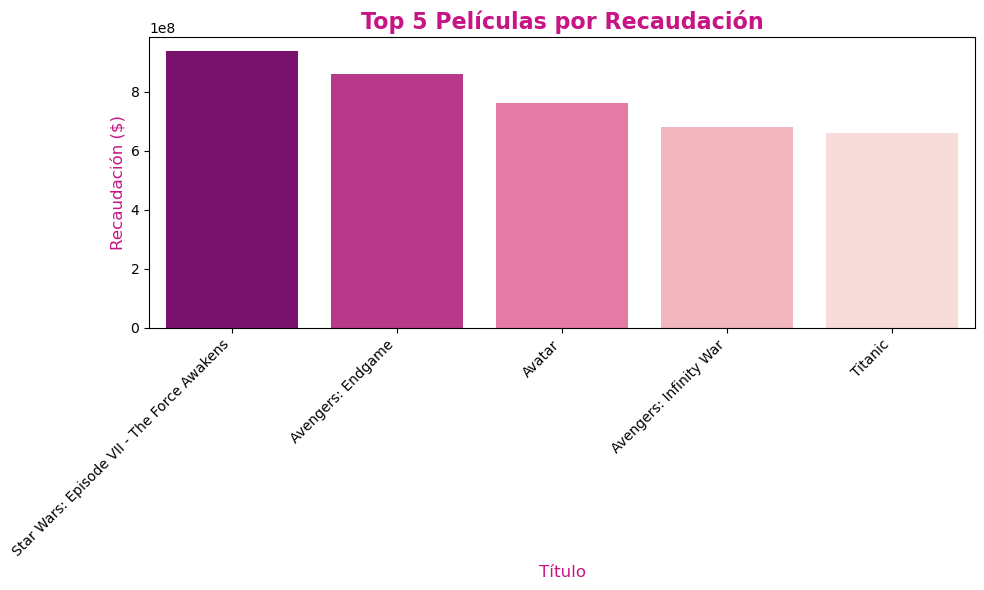

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar y seleccionar las 5 primeras por Gross
top5 = df.sort_values(by='Gross', ascending=False).head(5)
print("\nLas 5 pel√≠culas m√°s taquilleras son:")
for idx, row in enumerate(top5.itertuples(), 1):
    print(f"{idx}. {row.Series_Title} ({row.Released_Year}) - ${row.Gross:,.0f}")

plt.figure(figsize=(10, 6))
sns.barplot(data=top5, x='Series_Title', y='Gross', hue='Series_Title', legend=False, palette='RdPu_r')
plt.title('Top 5 Pel√≠culas por Recaudaci√≥n', fontsize=16, fontweight='bold', color='#C71585')
plt.xlabel('T√≠tulo', fontsize=12, color='#C71585')
plt.ylabel('Recaudaci√≥n ($)', fontsize=12, color='#C71585')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Permite ver si existe relaci√≥n entre la popularidad econ√≥mica y la valoraci√≥n cr√≠tica.

# Top 10 Generos M√°s Frecuentes

Se agrupan las pel√≠culas por el campo Genre y se cuentan cu√°ntas pertenecen a cada categor√≠a.


Frecuencia de g√©neros:
Genre
Drama        192
Action       127
Comedy       104
Crime         74
Biography     73
Animation     63
Adventure     58
Horror         9
Mystery        7
Western        4
Family         2
Film-Noir      1
Name: count, dtype: int64


C:\Users\crica\AppData\Local\Temp\ipykernel_1428\4086218582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='PiYG_r')


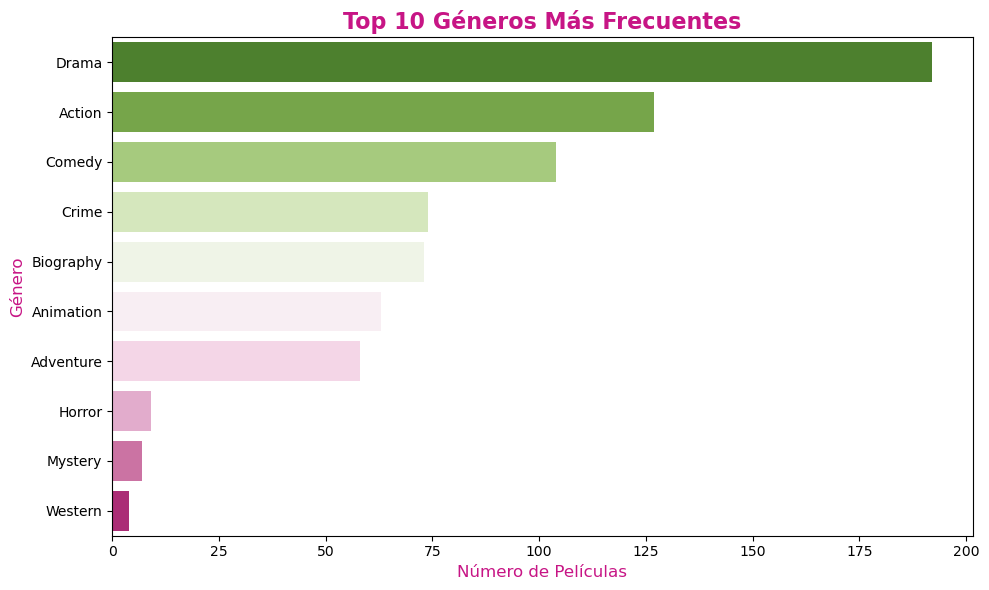

In [12]:
genre_counts = df['Genre'].value_counts()
print("\nFrecuencia de g√©neros:")
print(genre_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='PiYG_r')
plt.title('Top 10 G√©neros M√°s Frecuentes', fontsize=16, fontweight='bold', color='#C71585')
plt.xlabel('N√∫mero de Pel√≠culas', fontsize=12, color='#C71585')
plt.ylabel('G√©nero', fontsize=12, color='#C71585')
plt.tight_layout()
plt.show()

- El g√©nero Drama suele ser el m√°s frecuente entre las pel√≠culas mejor calificadas.
- Los g√©neros con menor representaci√≥n pueden pertenecer a nichos m√°s espec√≠ficos o tener menor audiencia como las peliculas navide√±as entro otros generos.

# Directores

Se identifican los directores con m√°s pel√≠culas en el top 1000, agrupando y contando sus apariciones.


Top 10 directores con m√°s pel√≠culas en el ranking:
 1. Steven Spielberg: 13 pel√≠culas
 2. Martin Scorsese: 10 pel√≠culas
 3. Alfred Hitchcock: 9 pel√≠culas
 4. Christopher Nolan: 8 pel√≠culas
 5. Clint Eastwood: 8 pel√≠culas
 6. Quentin Tarantino: 8 pel√≠culas
 7. David Fincher: 8 pel√≠culas
 8. Hayao Miyazaki: 7 pel√≠culas
 9. Rob Reiner: 7 pel√≠culas
10. Woody Allen: 7 pel√≠culas

An√°lisis detallado de los 5 directores m√°s prol√≠ficos:
                   Rating Promedio  Recaudaci√≥n Promedio  Num. Pel√≠culas
Director                                                                
Steven Spielberg                 8             190625628              13
Martin Scorsese                  8              53831920              10
Alfred Hitchcock                 8              13234378               9
Christopher Nolan                8             242181763               8
Clint Eastwood                   8              74086580               8

‚úì Director con mejor rating promedio

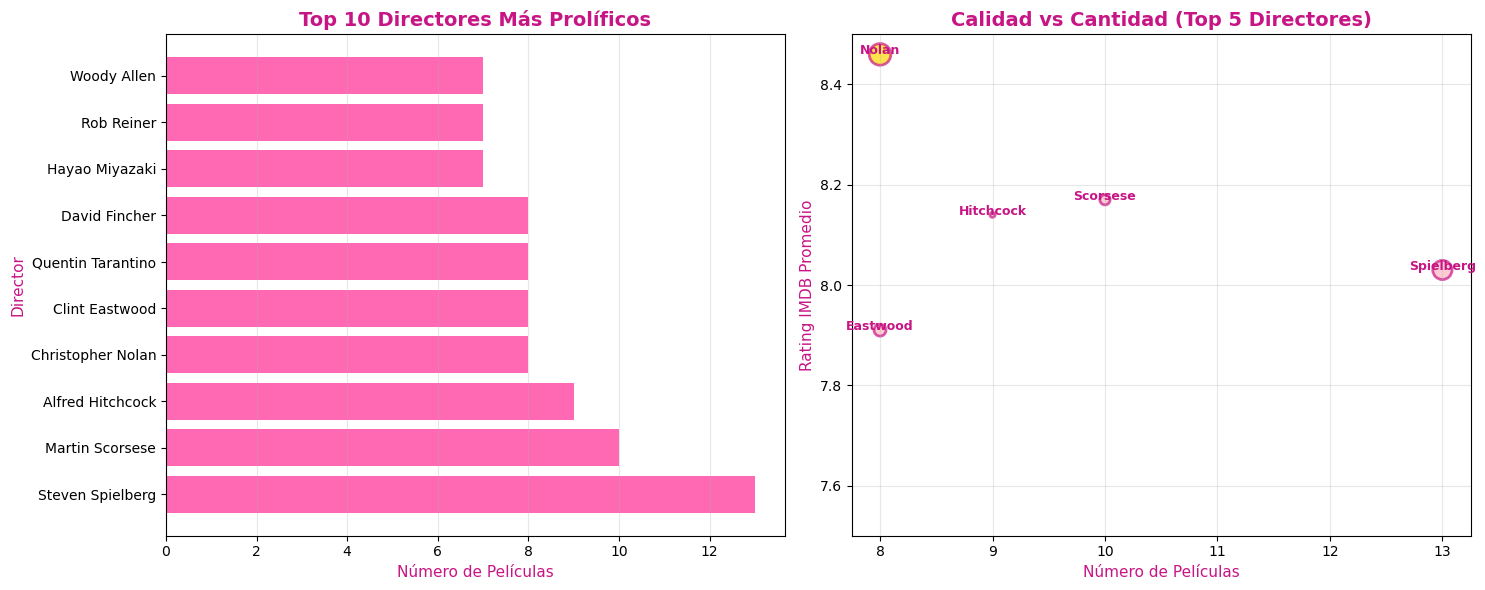

In [13]:
# Top 10 directores por cantidad de pel√≠culas
top_directors = df['Director'].value_counts().head(10)
print("\nTop 10 directores con m√°s pel√≠culas en el ranking:")
for idx, (director, count) in enumerate(top_directors.items(), 1):
    print(f"{idx:2d}. {director}: {count} pel√≠culas")

# An√°lisis detallado de top 5 directores
top5_directors = top_directors.head(5).index
director_analysis = df[df['Director'].isin(top5_directors)].groupby('Director').agg({
    'IMDB_Rating': 'mean',
    'Gross': 'mean',
    'Series_Title': 'count'
}).round(2)
director_analysis.columns = ['Rating Promedio', 'Recaudaci√≥n Promedio', 'Num. Pel√≠culas']
director_analysis = director_analysis.sort_values('Num. Pel√≠culas', ascending=False)

print("\nAn√°lisis detallado de los 5 directores m√°s prol√≠ficos:")
print(director_analysis)

# Identificar al director m√°s exitoso
mejor_director = director_analysis['Rating Promedio'].idxmax()
print(f"\n‚úì Director con mejor rating promedio: {mejor_director}")
print(f"  ({director_analysis.loc[mejor_director, 'Rating Promedio']:.2f} puntos IMDB)")

# Visualizaci√≥n
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: N√∫mero de pel√≠culas por director
axes[0].barh(top_directors.head(10).index, top_directors.head(10).values, color='#FF69B4')
axes[0].set_title('Top 10 Directores M√°s Prol√≠ficos', fontsize=14, fontweight='bold', color='#C71585')
axes[0].set_xlabel('N√∫mero de Pel√≠culas', fontsize=11, color='#C71585')
axes[0].set_ylabel('Director', fontsize=11, color='#C71585')
axes[0].grid(axis='x', alpha=0.3)

# Gr√°fico 2: Rating promedio vs N√∫mero de pel√≠culas (Top 5)
colors = ['#FFD700' if director == mejor_director else '#FFB6C1' for director in director_analysis.index]
axes[1].scatter(director_analysis['Num. Pel√≠culas'], 
               director_analysis['Rating Promedio'],
               s=director_analysis['Recaudaci√≥n Promedio']/1e6,  # Tama√±o por recaudaci√≥n
               c=colors, alpha=0.7, edgecolors='#C71585', linewidth=2)

for director in director_analysis.index:
    axes[1].annotate(director.split()[-1],  # Solo apellido
                    (director_analysis.loc[director, 'Num. Pel√≠culas'],
                     director_analysis.loc[director, 'Rating Promedio']),
                    fontsize=9, ha='center', color='#C71585', fontweight='bold')

axes[1].set_title('Calidad vs Cantidad (Top 5 Directores)', fontsize=14, fontweight='bold', color='#C71585')
axes[1].set_xlabel('N√∫mero de Pel√≠culas', fontsize=11, color='#C71585')
axes[1].set_ylabel('Rating IMDB Promedio', fontsize=11, color='#C71585')
axes[1].grid(alpha=0.3)
axes[1].set_ylim(7.5, 8.5)

plt.tight_layout()
plt.show()


- Directores como Christopher Nolan, Steven Spielberg o Martin Scorsese suelen tener m√∫ltiples obras destacadas.
- Esto permite reconocer a los directores m√°s influyentes en el cine

# Calidad

In [14]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Paleta de colores rosa personalizada
pink_palette = ['#FFB6C1', '#FF69B4', '#FF1493', '#C71585', '#DB7093']
pink_cmap = sns.blend_palette(pink_palette, as_cmap=True)

In [19]:
print("\n TOP 5 PEL√çCULAS M√ÅS VOTADAS:")
print("-"*60)
top5_votes = df.nlargest(5, 'No_of_Votes')[['Series_Title', 'No_of_Votes', 'IMDB_Rating', 'Released_Year']]
for idx, row in top5_votes.iterrows():
    print(f"{row['Series_Title']} ({row['Released_Year']})")
    print(f"   Votos: {row['No_of_Votes']:,.0f} | Rating: {row['IMDB_Rating']}")



 TOP 5 PEL√çCULAS M√ÅS VOTADAS:
------------------------------------------------------------
The Shawshank Redemption (1994)
   Votos: 2,343,110 | Rating: 9.3
The Dark Knight (2008)
   Votos: 2,303,232 | Rating: 9.0
Inception (2010)
   Votos: 2,067,042 | Rating: 8.8
Fight Club (1999)
   Votos: 1,854,740 | Rating: 8.8
Pulp Fiction (1994)
   Votos: 1,826,188 | Rating: 8.9


c:\Users\crica\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  func(*args, **kwargs)
c:\Users\crica\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


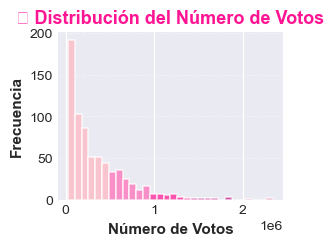

In [16]:
ax3 = plt.subplot(2, 2, 3)
n, bins, patches = ax3.hist(df['No_of_Votes'], bins=30, color='#FF69B4', 
                            alpha=0.7, edgecolor='white', linewidth=1.2)
# Gradiente de color para el histograma
for i, patch in enumerate(patches):
    patch.set_facecolor(pink_palette[min(i*len(pink_palette)//len(patches), len(pink_palette)-1)])
ax3.set_xlabel('N√∫mero de Votos', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax3.set_title('üìà Distribuci√≥n del N√∫mero de Votos', fontsize=13, fontweight='bold', color='#FF1493')
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')


- La mayor√≠a de las pel√≠culas del top presentan puntuaciones entre 7 y 9.

- No hay grandes desviaciones, lo que confirma una selecci√≥n de t√≠tulos de alta calidad.

# Top 10 Peliculas m√°s Votadas

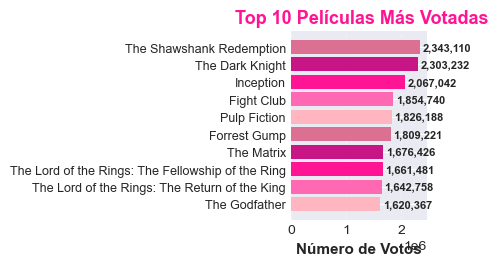

In [21]:
# 4. BARRAS HORIZONTALES: Top 10 m√°s votadas
ax4 = plt.subplot(2, 2, 4)
top10 = df.nlargest(10, 'No_of_Votes')[['Series_Title', 'No_of_Votes']].sort_values('No_of_Votes')
bars = ax4.barh(range(len(top10)), top10['No_of_Votes'].values, color=pink_palette)
ax4.set_yticks(range(len(top10)))
ax4.set_yticklabels(top10['Series_Title'].values, fontsize=9)
ax4.set_xlabel('N√∫mero de Votos', fontsize=11, fontweight='bold')
ax4.set_title(' Top 10 Pel√≠culas M√°s Votadas', fontsize=13, fontweight='bold', color='#FF1493')
ax4.grid(True, alpha=0.3, axis='x', linestyle='--')

# A√±adir valores en las barras
for i, (bar, val) in enumerate(zip(ax4.patches, top10['No_of_Votes'].values)):
    ax4.text(val + 50000, bar.get_y() + bar.get_height()/2, 
            f'{val:,.0f}', va='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()


La producci√≥n de pel√≠culas ha aumentado con el tiempo. Sin embargo, muchas pel√≠culas antiguas siguen manteniendo calificaciones muy altas.

# Duraci√≥n de la Pelicula


Estad√≠sticas de duraci√≥n (minutos):
  M√≠nima: 72
  M√°xima: 238
  Promedio: 124
  Mediana: 120

An√°lisis por categor√≠a de duraci√≥n:
              Rating Promedio  Recaudaci√≥n Promedio  Cantidad
Duracion_Cat                                                 
Corta                       8              59160188        41
Media                       8              61392754       321
Larga                       8              94256052       326
Muy Larga                   8             123022506        26


C:\Users\crica\AppData\Local\Temp\ipykernel_1428\2703472051.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duracion_stats = df.groupby('Duracion_Cat').agg({


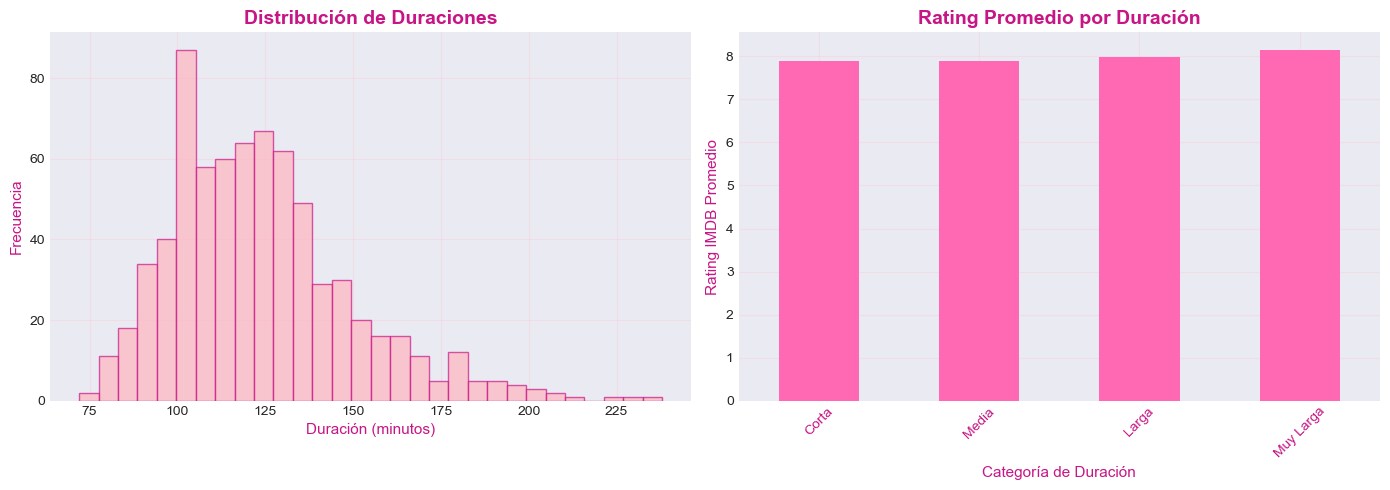

In [18]:
print(f"\nEstad√≠sticas de duraci√≥n (minutos):")
print(f"  M√≠nima: {df['Runtime'].min()}")
print(f"  M√°xima: {df['Runtime'].max()}")
print(f"  Promedio: {df['Runtime'].mean():.0f}")
print(f"  Mediana: {df['Runtime'].median():.0f}")

# Categorizar duraciones
df['Duracion_Cat'] = pd.cut(df['Runtime'], 
                             bins=[0, 90, 120, 180, 400],
                             labels=['Corta', 'Media', 'Larga', 'Muy Larga'])

duracion_stats = df.groupby('Duracion_Cat').agg({
    'IMDB_Rating': 'mean',
    'Gross': 'mean',
    'Series_Title': 'count'
}).round(2)
duracion_stats.columns = ['Rating Promedio', 'Recaudaci√≥n Promedio', 'Cantidad']

print("\nAn√°lisis por categor√≠a de duraci√≥n:")
print(duracion_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de duraciones
axes[0].hist(df['Runtime'], bins=30, edgecolor='#C71585', alpha=0.7, color='#FFB6C1')
axes[0].set_title('Distribuci√≥n de Duraciones', fontsize=14, fontweight='bold', color='#C71585')
axes[0].set_xlabel('Duraci√≥n (minutos)', fontsize=11, color='#C71585')
axes[0].set_ylabel('Frecuencia', fontsize=11, color='#C71585')
axes[0].grid(alpha=0.3, color='#FFC0CB')

# Rating promedio por categor√≠a
duracion_stats['Rating Promedio'].plot(kind='bar', ax=axes[1], color='#FF69B4')
axes[1].set_title('Rating Promedio por Duraci√≥n', fontsize=14, fontweight='bold', color='#C71585')
axes[1].set_xlabel('Categor√≠a de Duraci√≥n', fontsize=11, color='#C71585')
axes[1].set_ylabel('Rating IMDB Promedio', fontsize=11, color='#C71585')
axes[1].tick_params(axis='x', rotation=45, colors='#C71585')
axes[1].grid(alpha=0.3, color='#FFC0CB')

plt.tight_layout()
plt.show()

Existe una correlaci√≥n positiva moderada entre la calificaci√≥n de IMDB y el puntaje de Metacritic. La recaudaci√≥n no siempre est√° ligada a una alta calificaci√≥n cr√≠tica.

## Conclusiones

El an√°lisis descriptivo revel√≥ que la mayor√≠a de las pel√≠culas del top presentan calificaciones entre 7.0 y 9.0, lo que evidencia un alto nivel de calidad general. Asimismo, se observ√≥ que la duraci√≥n promedio ronda los 120 minutos, lo cual coincide con el est√°ndar de producciones cinematogr√°ficas de gran impacto.

Al estudiar la distribuci√≥n por g√©nero, se identific√≥ que el Drama es el m√°s frecuente dentro del ranking, seguido por Acci√≥n y Comedia, lo que demuestra la preferencia del p√∫blico y la cr√≠tica por historias con profundidad emocional o contenido narrativo complejo. En cuanto a los directores, nombres como Christopher Nolan, Steven Spielberg y Martin Scorsese aparecen de forma recurrente, reflejando su influencia y consistencia en la industria.

El an√°lisis de la distribuci√≥n de calificaciones mostr√≥ que la mayor√≠a de los t√≠tulos mantienen puntajes altos y poca dispersi√≥n, mientras que el estudio de la recaudaci√≥n bruta (Gross) evidenci√≥ que el √©xito econ√≥mico no siempre est√° vinculado con la valoraci√≥n cr√≠tica: existen pel√≠culas altamente taquilleras con calificaciones promedio, as√≠ como producciones muy valoradas que no fueron √©xitos comerciales.

En la dimensi√≥n temporal, el an√°lisis por a√±o de lanzamiento indic√≥ un incremento sostenido en la producci√≥n de pel√≠culas en las √∫ltimas d√©cadas, aunque los cl√°sicos antiguos conservan posiciones destacadas en los rankings, lo que resalta su vigencia e impacto cultural. Finalmente, las correlaciones entre variables permitieron observar una relaci√≥n positiva entre las calificaciones de IMDB y los puntajes de Metacritic, mientras que la recaudaci√≥n mostr√≥ una correlaci√≥n m√°s d√©bil, confirmando que la calidad percibida por la cr√≠tica y el √©xito financiero responden a factores distintos.